In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

D:\Python\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Import SET50 Stock Data Set
cols = ['Name', 'Volume', 'MCap','PE', 'PB','DE','EPS','ROA','ROE', 'NPM','Yield','EV/EBITDA']

data = pd.read_csv('/Users/AdMiN/Desktop/Data Science Projects/SET50 cluster with KMeans/SET50_Stock.csv',header=0, names=cols, encoding= 'unicode_escape')

#Check Data Set
data.head()

,Name,Volume,MCap,PE,PB,DE,EPS,ROA,ROE,NPM,Yield,EV/EBITDA
0,PTTEP,6900600,494263,10.74,1.35,0.66,11.60,12.77,12.31,25.95,4.00,4.88
1,TRUE,123747200,154161,63.55,1.23,3.14,0.07,2.75,1.81,4.68,1.93,6.87
2,PTT,55385800,1263913,13.29,1.46,1.31,3.33,7.81,11.05,4.47,4.49,8.08
3,BANPU,12995300,60911,25.14,0.82,2.23,0.47,5.39,3.05,1.20,5.98,8.61
4,PTTGC,7828300,254750,16.50,0.89,0.55,3.42,4.16,5.31,3.38,7.53,10.16


# Exploratory Data Analysis (EDA)

In [3]:
#Check Data Shape
data.shape

(50, 12)

We have 50 stocks from SET50 and 11 attributes for analysis and 1 attribute as stock names

In [4]:
#Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       50 non-null     object 
 1   Volume     50 non-null     int64  
 2   MCap       50 non-null     int64  
 3   PE         50 non-null     float64
 4   PB         50 non-null     float64
 5   DE         50 non-null     float64
 6   EPS        50 non-null     float64
 7   ROA        50 non-null     float64
 8   ROE        50 non-null     float64
 9   NPM        50 non-null     float64
 10  Yield      50 non-null     float64
 11  EV/EBITDA  50 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.8+ KB


In [5]:
#Review Statistic Summary or our data set
data.describe()

,Volume,MCap,PE,PB,DE,EPS,ROA,ROE,NPM,Yield,EV/EBITDA
count,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,2.038487e+07,2.353643e+05,28.671800,3.734600,2.673400,3.918000,8.050600,14.743000,16.754200,2.791600,14.10660
std,3.278151e+07,2.402718e+05,32.192144,3.076228,2.707882,5.942893,5.672653,10.949434,13.808658,1.898666,9.97709
min,1.117000e+06,5.369800e+04,0.000000,0.000000,0.240000,0.000000,-0.590000,-2.630000,-0.360000,0.000000,0.00000
25%,4.751600e+06,9.303700e+04,14.020000,1.352500,0.915000,0.707500,4.137500,8.922500,5.805000,1.385000,7.17250
50%,8.243900e+06,1.641585e+05,20.950000,2.190000,1.795000,1.845000,7.740000,12.285000,15.115000,2.145000,14.53500
75%,2.484772e+07,2.508055e+05,32.567500,5.517500,3.102500,3.397500,10.217500,19.460000,25.337500,4.050000,20.88750
max,1.891232e+08,1.263913e+06,217.640000,10.880000,13.220000,29.480000,21.300000,54.980000,67.320000,7.730000,37.53000


Look at mean and std of our data are different so we have to normalize them for KMeans Algo

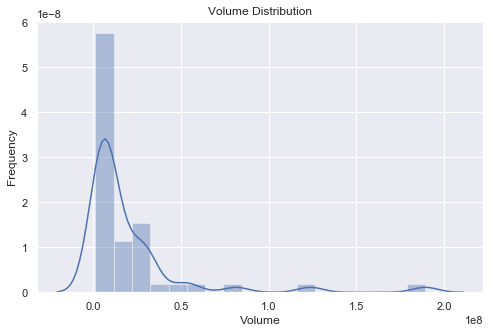

In [6]:
#Check Distribution of Each Attribute via Visualization
plt.figure(figsize=(8,5))
sns.distplot(data['Volume'])
plt.title('Volume Distribution')
plt.ylabel('Frequency')
plt.show()

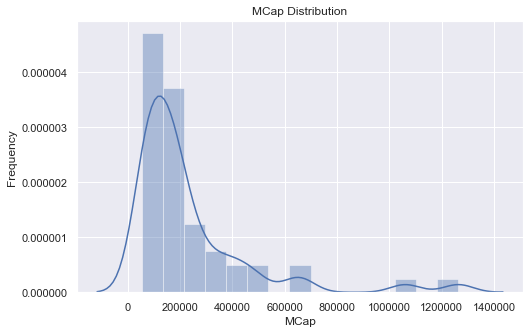

In [7]:
plt.figure(figsize=(8,5))
sns.distplot(data['MCap'])
plt.title('MCap Distribution')
plt.ylabel('Frequency')
plt.show()

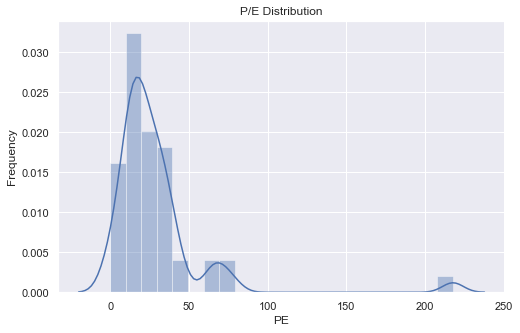

In [8]:
plt.figure(figsize=(8,5))
sns.distplot(data['PE'])
plt.title('P/E Distribution')
plt.ylabel('Frequency')
plt.show()

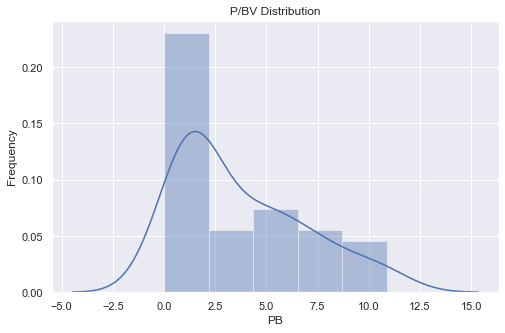

In [9]:
plt.figure(figsize=(8,5))
sns.distplot(data['PB'])
plt.title('P/BV Distribution')
plt.ylabel('Frequency')
plt.show()

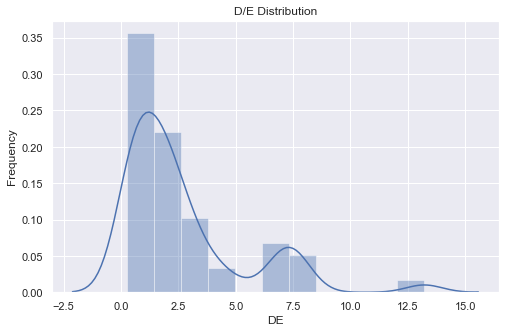

In [10]:
plt.figure(figsize=(8,5))
sns.distplot(data['DE'])
plt.title('D/E Distribution')
plt.ylabel('Frequency')
plt.show()

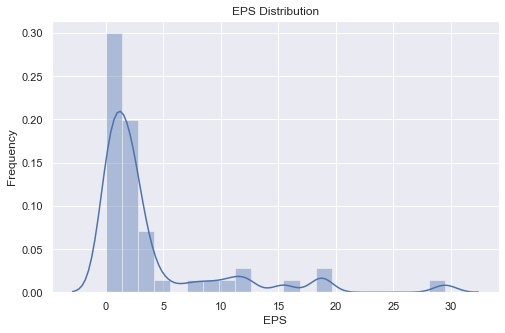

In [11]:
plt.figure(figsize=(8,5))
sns.distplot(data['EPS'])
plt.title('EPS Distribution')
plt.ylabel('Frequency')
plt.show()

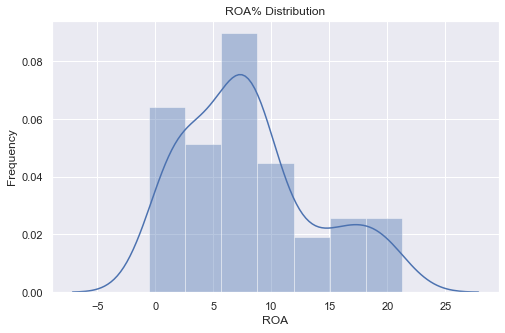

In [12]:
plt.figure(figsize=(8,5))
sns.distplot(data['ROA'])
plt.title('ROA% Distribution')
plt.ylabel('Frequency')
plt.show()

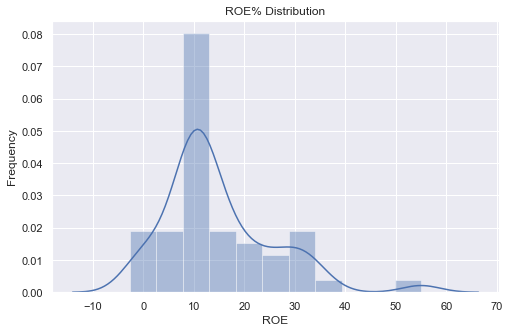

In [13]:
plt.figure(figsize=(8,5))
sns.distplot(data['ROE'])
plt.title('ROE% Distribution')
plt.ylabel('Frequency')
plt.show()

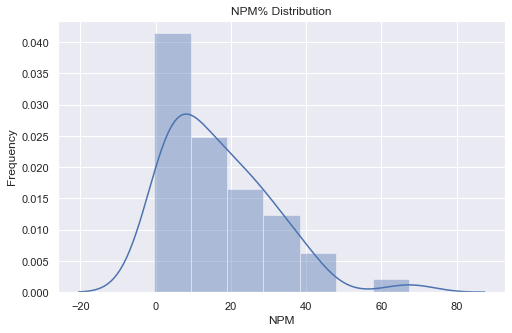

In [14]:
plt.figure(figsize=(8,5))
sns.distplot(data['NPM'])
plt.title('NPM% Distribution')
plt.ylabel('Frequency')
plt.show()

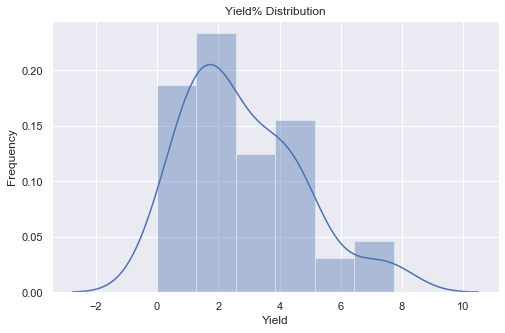

In [15]:
plt.figure(figsize=(8,5))
sns.distplot(data['Yield'])
plt.title('Yield% Distribution')
plt.ylabel('Frequency')
plt.show()

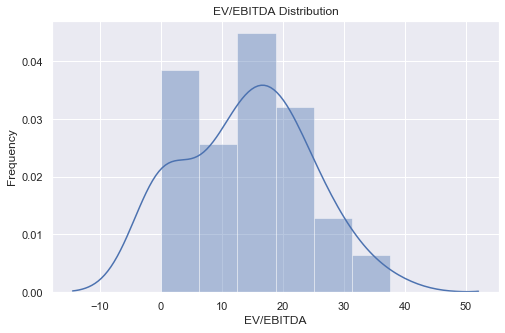

In [16]:
plt.figure(figsize=(8,5))
sns.distplot(data['EV/EBITDA'])
plt.title('EV/EBITDA Distribution')
plt.ylabel('Frequency')
plt.show()

So we verify all attribute by distribution to see skewness, almost attributes are right skewness. Before clustering we have to prepare our data through data preprocessing to adjust distribution to normal by Logarithm Transformation

In [17]:
#Check Mission Values
data.isnull().sum()

Name         0
Volume       0
MCap         0
PE           0
PB           0
DE           0
EPS          0
ROA          0
ROE          0
NPM          0
Yield        0
EV/EBITDA    0
dtype: int64

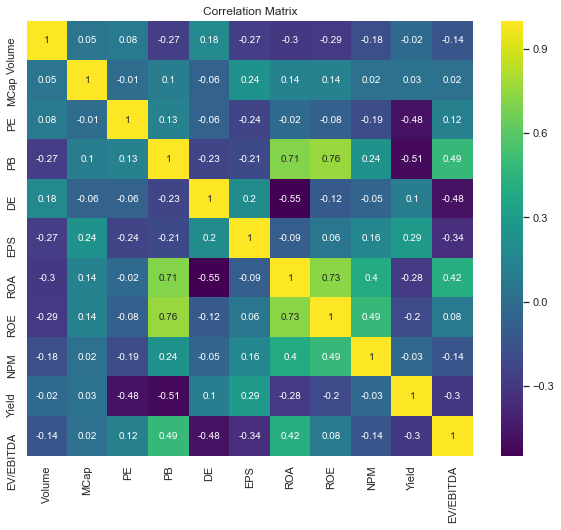

In [18]:
#Correlation Matrix 
corr = data.corr().round(2)

plt.figure(figsize=(10,8))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

We can specify each attribute to factor category as following

Value Fator includes P/E, P/BV, and EV/EBITDA

Quality Factor includes ROA%, ROE%, D/E, NPM%

Yield Factor includes Yield%

Size Factor includes MCap (M)

Liquidity Factor includes Volume

In this project for Value Factor, we gonna focus only EV/EBITDA. Therefore in data pre-processing we gonna drop P/E and P/BV

# Data Pre-processing

In [32]:
#Import Important Library
from sklearn.preprocessing import StandardScaler

#Set Name as Index
data_attr = data.set_index('Name')

#Drop PE and PB columns
data_attr = data_attr.drop(['PE','PB'], axis=1)
data_attr.head()

,Volume,MCap,DE,EPS,ROA,ROE,NPM,Yield,EV/EBITDA
Name,,,,,,,,,
PTTEP,6900600,494263,0.66,11.60,12.77,12.31,25.95,4.00,4.88
TRUE,123747200,154161,3.14,0.07,2.75,1.81,4.68,1.93,6.87
PTT,55385800,1263913,1.31,3.33,7.81,11.05,4.47,4.49,8.08
BANPU,12995300,60911,2.23,0.47,5.39,3.05,1.20,5.98,8.61
PTTGC,7828300,254750,0.55,3.42,4.16,5.31,3.38,7.53,10.16


We got problems about log transformation due to Zero Value and Negative Value so we have to plus some constant value to get positive before transform

In [33]:
#Check min value 
min_val = min(data_attr.min())
min_val

-2.63

In [34]:
#Logarithm Transformation
data_log = np.log(data_attr+1-min_val)

In [35]:
#Normalization Data Set and keep to separate variable 
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)

#Make it to Data Frame
data_normalized = pd.DataFrame(data_normalized, index=data_attr.index, columns=data_attr.columns)
data_normalized.head()

,Volume,MCap,DE,EPS,ROA,ROE,NPM,Yield,EV/EBITDA
Name,,,,,,,,,
PTTEP,-0.355623,1.408034,-0.889258,1.642821,0.905938,0.081745,0.846446,0.753988,-0.637986
TRUE,2.244380,-0.123849,0.399694,-0.984910,-0.948473,-1.427191,-0.917824,-0.366425,-0.368633
PTT,1.520288,2.642549,-0.490666,0.188518,0.198507,-0.033835,-0.953391,0.974334,-0.228828
BANPU,0.214504,-1.344758,-0.008146,-0.794267,-0.268323,-1.138978,-1.671831,1.570753,-0.172087
PTTGC,-0.242011,0.536573,-0.962647,0.212379,-0.556279,-0.729947,-1.154223,2.100114,-0.019251


# Modeling

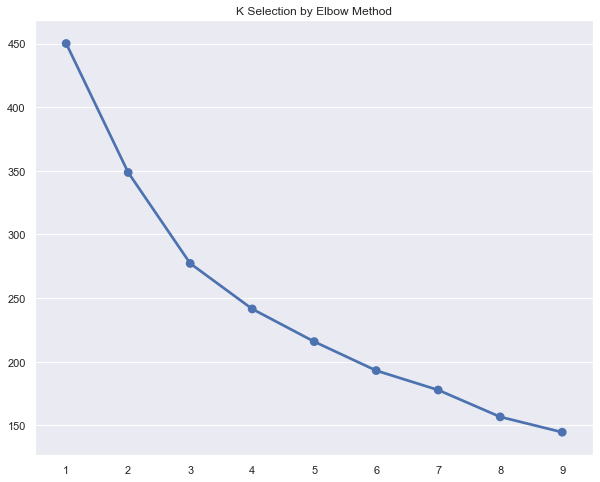

In [36]:
from sklearn.cluster import KMeans

#K selection via Elbow Method
sse={}

for k in range (1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_

#Plot SSE for each *k*
plt.figure(figsize=(10,8))
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.title('K Selection by Elbow Method')
plt.show()

from visualization, we gonna choose k = 3 for analyzing

In [37]:
#Modeling
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
cluster_labels

array([0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 2])

In [38]:
data_attr['Cluster'] = cluster_labels
data_attr.head()

,Volume,MCap,DE,EPS,ROA,ROE,NPM,Yield,EV/EBITDA,Cluster
Name,,,,,,,,,,
PTTEP,6900600,494263,0.66,11.60,12.77,12.31,25.95,4.00,4.88,0
TRUE,123747200,154161,3.14,0.07,2.75,1.81,4.68,1.93,6.87,2
PTT,55385800,1263913,1.31,3.33,7.81,11.05,4.47,4.49,8.08,2
BANPU,12995300,60911,2.23,0.47,5.39,3.05,1.20,5.98,8.61,2
PTTGC,7828300,254750,0.55,3.42,4.16,5.31,3.38,7.53,10.16,2


# Analyzing Data Set for Each Attribute

In [39]:
data_attr_k3 = data_attr.assign(Cluster = cluster_labels)
data_attr_k3.head()

,Volume,MCap,DE,EPS,ROA,ROE,NPM,Yield,EV/EBITDA,Cluster
Name,,,,,,,,,,
PTTEP,6900600,494263,0.66,11.60,12.77,12.31,25.95,4.00,4.88,0
TRUE,123747200,154161,3.14,0.07,2.75,1.81,4.68,1.93,6.87,2
PTT,55385800,1263913,1.31,3.33,7.81,11.05,4.47,4.49,8.08,2
BANPU,12995300,60911,2.23,0.47,5.39,3.05,1.20,5.98,8.61,2
PTTGC,7828300,254750,0.55,3.42,4.16,5.31,3.38,7.53,10.16,2


In [40]:
#Calculate mean of each attribute for each cluster
data_attr_k3.groupby(['Cluster']).agg({
                      'Volume':'mean',
                       'MCap' :'mean',
                       'DE' :'mean',
                       'EPS':'mean',
                       'ROA':'mean',
                       'ROE':'mean',
                       'NPM':'mean',
                       'Yield':'mean',
                       'EV/EBITDA':'mean'}).round(0)

,Volume,MCap,DE,EPS,ROA,ROE,NPM,Yield,EV/EBITDA
Cluster,,,,,,,,,
0,7275300.0,321217.0,6.0,14.0,5.0,16.0,21.0,4.0,4.0
1,12778358.0,204942.0,1.0,2.0,12.0,20.0,23.0,2.0,18.0
2,39988119.0,227340.0,3.0,1.0,4.0,5.0,5.0,3.0,15.0


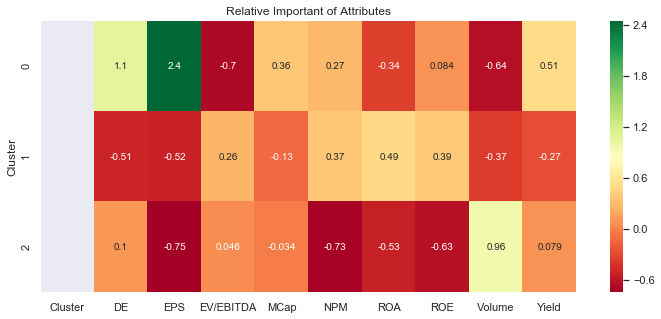

In [45]:
#Analyzing with Relative Importance of Segment Attributes
Cluster_avg = data_attr_k3.groupby(['Cluster']).mean()
Population_avg = data_attr.mean()
relative_imp = Cluster_avg/Population_avg-1

#Plot heatmap for easier to interprete
plt.figure(figsize=(12,5))
plt.title('Relative Important of Attributes')
sns.heatmap(data=relative_imp, annot=True, cmap='RdYlGn')
plt.show()

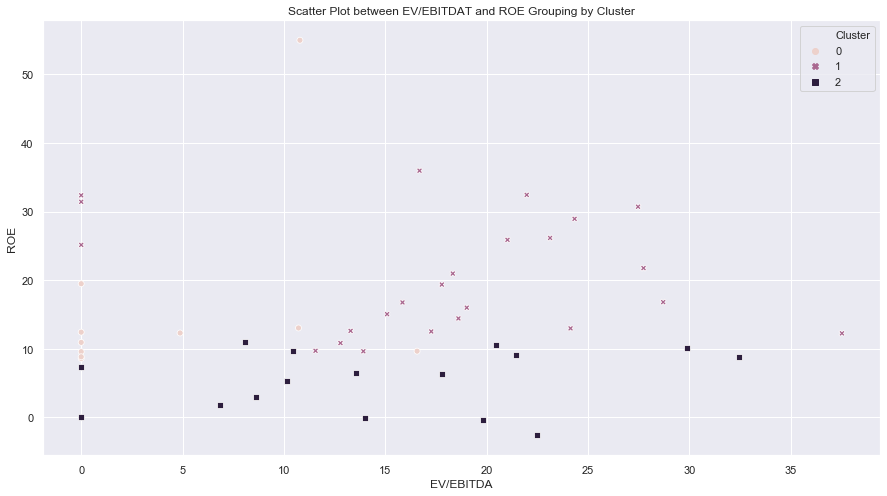

In [51]:
#Scatter Plot between Value Factor (EV/EBITDA) and Quality Factor (ROE)
plt.figure(figsize=(15,8))
plt.title('Scatter Plot between EV/EBITDAT and ROE Grouping by Cluster')
sns.scatterplot(x='EV/EBITDA', y='ROE', hue='Cluster', style='Cluster', data=data_attr_k3)

In [52]:
#Save File 
data_attr_k3.to_csv('/Users/AdMiN/Desktop/Data Science Projects/SET50 cluster with KMeans/SET50 with clusters.csv')

In [56]:
#Stock Cluster_0
cluster_0 = data_attr_k3[data_attr_k3['Cluster']==0].index
cluster_0

Index(['PTTEP', 'SCC', 'ADVANC', 'EGCO', 'BBL', 'KBANK', 'KTB', 'SCB', 'TCAP',
       'TISCO'],
      dtype='object', name='Name')

In [57]:
#Stock Cluster_1
cluster_1 = data_attr_k3[data_attr_k3['Cluster']==1].index
cluster_1

Index(['BPP', 'DELTA', 'MINT', 'RATCH', 'ROBINS', 'LH', 'INTUCH', 'WHA',
       'BDMS', 'BH', 'BEM', 'CPN', 'CPALL', 'HMPRO', 'EA', 'GLOBAL', 'OSP',
       'CBG', 'TOA', 'AOT', 'GULF', 'KTC', 'MTC', 'SAWAD'],
      dtype='object', name='Name')

In [58]:
#Stock Cluster_2
cluster_2 = data_attr_k3[data_attr_k3['Cluster']==2].index
cluster_2

Index(['TRUE', 'PTT', 'BANPU', 'PTTGC', 'CPF', 'IVL', 'DTAC', 'BJC', 'TOP',
       'BGRIM', 'TU', 'IRPC', 'GPSC', 'BTS', 'AWC', 'TMB'],
      dtype='object', name='Name')